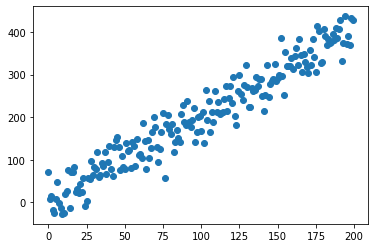

In [173]:
# l_1 and l_infinity regression using cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# generate a synthetic dataset

#actual parameter values
theta1_act = 2
theta2_act = 5

# Number of points in dataset
N = 200

# Noise magnitude
mag = 30

# datapoints
x = np.arange(0,N)
y = theta1_act * x + theta2_act *np.ones([1,N]) + np.random.normal(0,mag,N)

plt.figure()
# Scatter plot of data
plt.scatter(x,y)
plt.show()

In [174]:
#parameters
theta = cp.Variable(2)
#introduced slack variable
s = cp.Variable(N)
#1 transpose
c = np.ones(N)
#b vector as defined previously in the assignment
b = np.append(-y,y)
#X matrix as defined in assignment instructions
X = np.stack((x,np.ones(N)),axis=-1)
#Y vector as defined in assignment instructions
Y = y.reshape(-1)

In [175]:
#solving the LP for l-1 norm
#including the two separated constraints of the slack variable
constraints1 = [-X@theta-s <= -Y,
                X@theta-s<= Y]
prob = cp.Problem(cp.Minimize(c.T@s),
                 constraints1)
prob.solve(solver='ECOS')

print("\nThe optimal value is", prob.value)
print("A solution x is")
print(theta.value)


The optimal value is 5117.246241197111
A solution x is
[2.02280151 2.05822777]


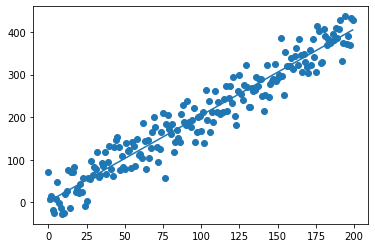

In [176]:
plt.figure()
# Scatter plot of data
plt.scatter(x,y)
plt.plot(x,[theta.value[0]*k+theta.value[1] for k in x])
plt.show()

In [177]:
#defining the new variables for the l-infinity norm
Theta = cp.Variable(2)
S = cp.Variable(1)
ones = np.ones(N)

In [178]:
constraints2 =[-X@Theta-S@ones <= -Y,
                X@Theta-S@ones <= Y]
prob2 = prob = cp.Problem(cp.Minimize(S),
                 constraints2)
prob.solve(solver='ECOS')
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(Theta.value)


The optimal value is 85.3814550226282
A solution x is
[  2.06914919 -15.05657783]


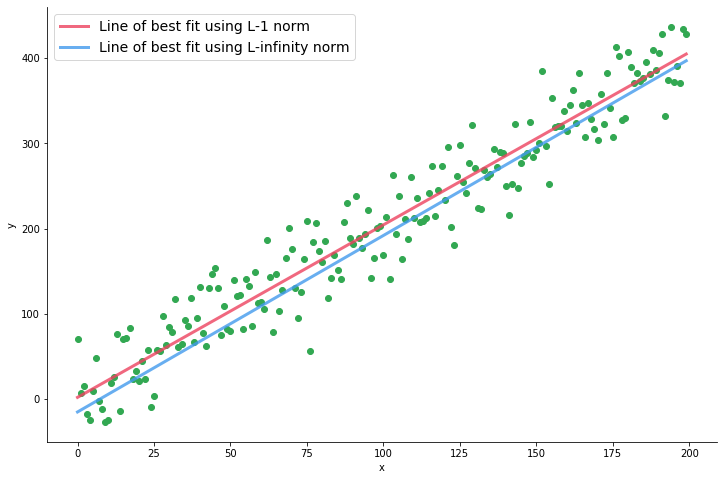

In [179]:
plt.figure(figsize=(12, 8))  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
plt.scatter(x,y, color = "#32a852")
plt.plot(x,[theta.value[0]*k+theta.value[1] for k in x], label='Line of best fit using L-1 norm', color = "#ed425f", linewidth=3,alpha=0.8)
plt.plot(x,[Theta.value[0]*k+Theta.value[1] for k in x], label='Line of best fit using L-infinity norm', color = "#429aed",linewidth=3,alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(prop={'size': 14})
plt.show()